# Name : Sunita Samantasinghar
### Post Graduate Program in Artificial Intelligence and Machine Learning
2022-2023

# Unsupervised Learning Project
## Part A
### • CONTEXT: 
The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5
continuous attributes.
To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

#### IMPORT ALL THE REQUIRED PACKAGES

In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

#### Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [5]:
car_name=pd.read_csv(r'C:\Users\Datta\Downloads\Part1+-+Car+name.csv')
car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


#### Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [6]:
car_json=pd.read_json(r'C:\Users\Datta\Downloads\Part1+-+Car-Attributes.json')
print(car_json.to_string())

      mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
5    15.0    8  429.0  198  4341  10.0  70       1
6    14.0    8  454.0  220  4354   9.0  70       1
7    14.0    8  440.0  215  4312   8.5  70       1
8    14.0    8  455.0  225  4425  10.0  70       1
9    15.0    8  390.0  190  3850   8.5  70       1
10   15.0    8  383.0  170  3563  10.0  70       1
11   14.0    8  340.0  160  3609   8.0  70       1
12   15.0    8  400.0  150  3761   9.5  70       1
13   14.0    8  455.0  225  3086  10.0  70       1
14   24.0    4  113.0   95  2372  15.0  70       3
15   22.0    6  198.0   95  2833  15.5  70       1
16   18.0    6  199.0   97  2774  15.5  70       1
17   21.0    6  200.0   85  2587  16.0  70       1
18   27.0    4   97.0   88  213

In [7]:
car_json.to_csv('C:\\Users\\Datta\\Downloads\\Car-Attributes.csv')

In [8]:
df_car_attr_formatted = pd.read_csv(r'C:\Users\Datta\Downloads\Car-Attributes.csv')

In [9]:
df_car_attr_formatted.head()

,Unnamed: 0,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0,18.0,8,307.0,130,3504,12.0,70,1
1,1,15.0,8,350.0,165,3693,11.5,70,1
2,2,18.0,8,318.0,150,3436,11.0,70,1
3,3,16.0,8,304.0,150,3433,12.0,70,1
4,4,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
df_car_attr_formatted.drop(labels= ['Unnamed: 0'], axis=1, inplace= True)

In [11]:
df_car_attr_formatted.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [12]:
df_car_attr_formatted.isna().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

#### Part 1.1 c - Merge both the DataFrames together to form a single DataFrame

In [13]:
df_car_attr_formatted['car_name'] = car_name

In [14]:
df_car_attr_formatted.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [15]:
df_car_attr_formatted.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [16]:
merged_df = pd.merge(car_name, df_car_attr_formatted, on= 'car_name' )

In [17]:
merged_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,chevrolet chevelle malibu,17.0,6,250.0,100,3329,15.5,71,1
2,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
3,chevrolet chevelle malibu,17.0,6,250.0,100,3329,15.5,71,1
4,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1


In [18]:
merged_df[merged_df.hp == '?']
merged_df['hp'].replace('?', np.nan, inplace= True)
merged_df[merged_df['hp'] == '?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


#### Part 1.1 d - Print 5 point summary of the numerical features and share insights.

In [19]:
print(merged_df.median())                                                       #Answer
print('\n')
print(merged_df.mean())
print('\n')
print(merged_df.min())
print('\n')
print(merged_df.max())
print('\n')
print(merged_df.std())

mpg         22.35
cyl          4.00
disp       151.00
hp          93.00
wt        2792.50
acc         15.50
yr          75.00
origin       1.00
dtype: float64


mpg         22.995857
cyl          5.467143
disp       195.096429
wt        2965.634286
acc         15.614714
yr          75.521429
origin       1.537143
dtype: float64


car_name    amc ambassador brougham
mpg                             9.0
cyl                               3
disp                           68.0
wt                             1613
acc                             8.0
yr                               70
origin                            1
dtype: object


car_name    vw rabbit custom
mpg                     46.6
cyl                        8
disp                   455.0
wt                      5140
acc                     24.8
yr                        82
origin                     3
dtype: object


mpg         7.289789
cyl         1.655720
disp      102.508234
wt        824.276039
acc         2.729136
yr         

C:\Users\Datta\AppData\Local\Temp\ipykernel_2252\2520645458.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(merged_df.median())                                                       #Answer
C:\Users\Datta\AppData\Local\Temp\ipykernel_2252\2520645458.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(merged_df.mean())
C:\Users\Datta\AppData\Local\Temp\ipykernel_2252\2520645458.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(merged_df.min())
C:\Users\Datta\AppD

**Five number summary is a part of descriptive statistics and consists of five values and all these values will help us to describe the data.**

- The minimum value (the lowest value)
- 25th Percentile or Q1
- 50th Percentile or Q2 or Median
- 75th Percentile or Q3
- Maximum Value (the highest value)

In [20]:
merged_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,22.995857,5.467143,195.096429,2965.634286,15.614714,75.521429,1.537143
std,7.289789,1.655720,102.508234,824.276039,2.729136,3.530914,0.800603
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,107.750000,2252.000000,14.000000,73.000000,1.000000
50%,22.350000,4.000000,151.000000,2792.500000,15.500000,75.000000,1.000000
75%,28.000000,6.000000,258.000000,3571.000000,17.000000,78.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [21]:
merged_df[merged_df['mpg'] == '']
merged_df[merged_df['cyl'] == '']
merged_df[merged_df['hp'] == '']
merged_df[merged_df['disp'] == '']
merged_df[merged_df['wt'] == '']
merged_df[merged_df['acc'] == '']
merged_df[merged_df['yr'] == '']
merged_df[merged_df['origin'] == '']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


#### Part 1.2 b - Check for duplicate values in the data and impute with the best suitable approach.

In [22]:
merged_df.duplicated().sum()

302

In [23]:
merged_df.drop_duplicates(inplace= True)

In [24]:
merged_df.duplicated().sum()
merged_df.reset_index(inplace= True) 

#### Part 1.2 c - Plot a pairplot for all features.

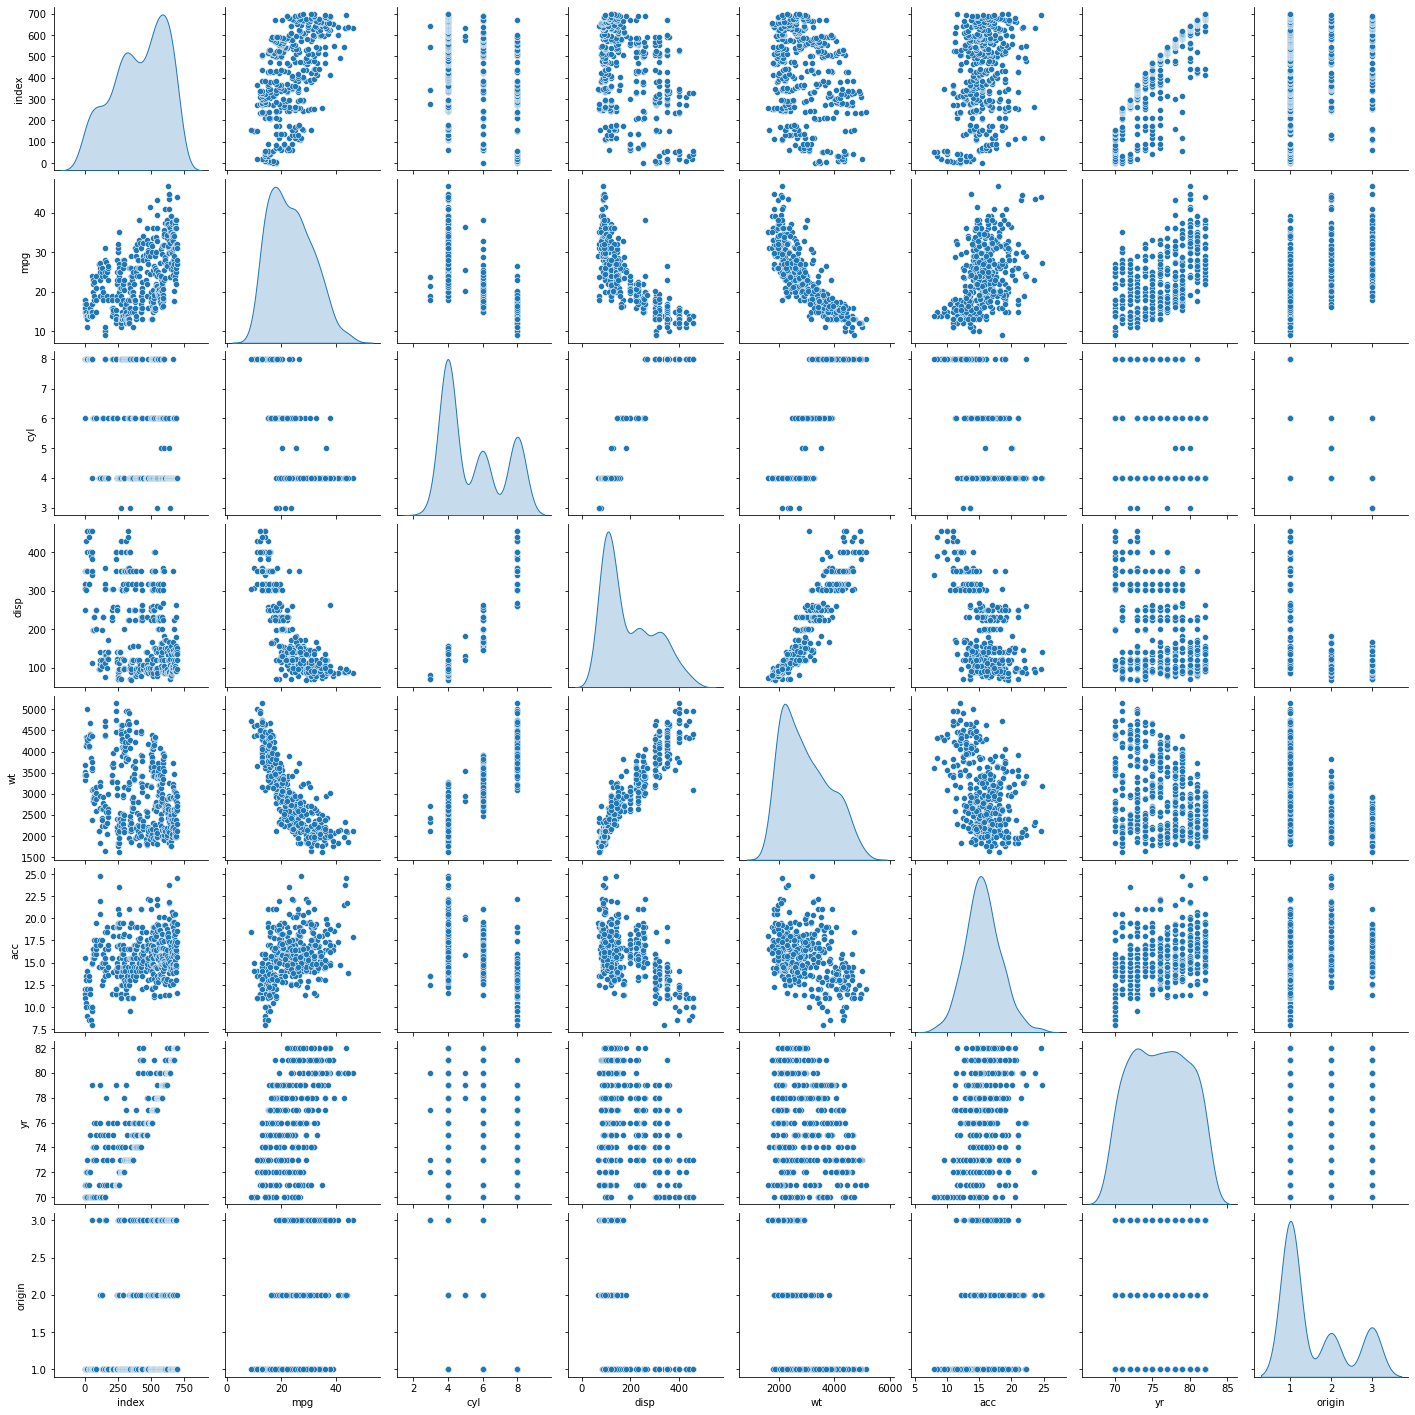

In [25]:
sns.pairplot(data= merged_df, diag_kind= 'kde');

#### Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

<AxesSubplot:xlabel='wt', ylabel='disp'>

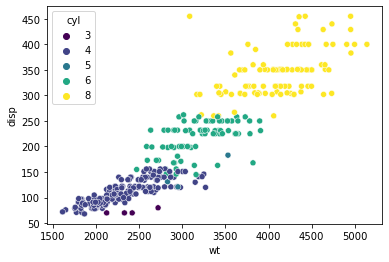

In [26]:
sns.scatterplot(x= merged_df['wt'], y= merged_df['disp'], data= merged_df, hue= merged_df['cyl'], palette= 'viridis')

#### Part 1.2 e - Share insights for Q2.d.

- Data between 'wt' and 'disp' are based on number of 'cyl' are slightly positive.
- Linearly correlated .
- As the weight and displacement increases, the number of cylinder is more in the car.

#### Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

<AxesSubplot:xlabel='wt', ylabel='mpg'>

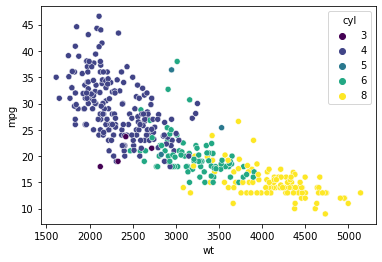

In [27]:
sns.scatterplot(x= merged_df['wt'], y= merged_df['mpg'], data= merged_df, hue= merged_df['cyl'], palette= 'viridis')

#### Part 1.2 g- Share insights for Q2.f.

- The data between miles per gallon and weight of the car based on no. of cylinders are slightly nagative and linearly correlated.
- As the no. of cylinders and weight increases, we can think that the miles per gallon/milage for the car will reduce.

#### Part 1.2 h - Check for unexpected values in all the features and datapoints with such values.

In [28]:
merged_df.isna().sum()

index       0
car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [29]:
merged_df[merged_df['hp'].isnull() == True]

,index,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
35,87,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
61,171,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
340,638,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
345,643,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
361,663,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
377,679,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


In [30]:
merged_df.replace(np.nan, merged_df['hp'].median(), inplace= True)
merged_df.iloc[[35, 61, 340, 345, 361, 377]]

,index,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
35,87,ford maverick,21.0,6,200.0,93.5,2875,17.0,74,1
61,171,ford pinto,25.0,4,98.0,93.5,2046,19.0,71,1
340,638,renault lecar deluxe,40.9,4,85.0,93.5,1835,17.3,80,2
345,643,ford mustang cobra,23.6,4,140.0,93.5,2905,14.3,80,1
361,663,renault 18i,34.5,4,100.0,93.5,2320,15.8,81,2
377,679,amc concord dl,23.0,4,151.0,93.5,3035,20.5,82,1


#### Part 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

In [31]:
merged_df.dtypes

index         int64
car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [32]:
merged_df = merged_df.astype({'hp' : 'float64'})
merged_df.dtypes

index         int64
car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [33]:
merged_df.drop(labels= 'index', axis=1 , inplace= True)

In [34]:
merged_df_col1 = merged_df['car_name']

In [35]:
merged_df.drop(labels= 'car_name', axis=1, inplace= True)

In [36]:
merged_df.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


In [37]:
merged_df_scaled = merged_df.apply(zscore)

In [38]:
merged_df_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145
1,-0.834543,0.320935,0.543257,-0.112746,0.423960,-0.024722,-1.356642,-0.715145
2,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145
3,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145
4,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145


In [39]:
k_means = KMeans(n_clusters = 2)

In [40]:
k_means.fit(merged_df_scaled)

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2)

In [41]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [42]:
k_means.inertia_

1588.5924567918632

In [43]:
wss= []
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(merged_df_scaled)
    wss.append(KM.inertia_)

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Datta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Datta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Datta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [44]:
wss

[1588.5924567918632,
 1190.0436525504854,
 987.9431670099705,
 829.7157874488787,
 750.892638379391,
 680.8097648250773,
 635.3095995408986,
 595.6593407306647,
 559.383160602946]

#### Part 1.3 b - Plot a visual and find elbow point.

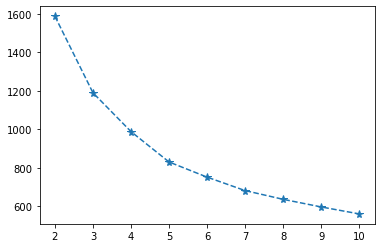

In [45]:
plt.plot(range(2,11), wss, marker= '*', markersize= 8,  linestyle= '--')

#### Part 1.3 c - On the above visual, highlight which are the possible Elbow points.

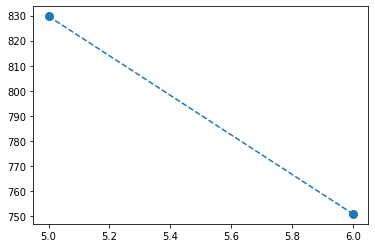

In [46]:
plt.plot(range(5,7), wss[3:5], marker= 'o', markersize= 8,  linestyle= '--')

- The ideal elbow points would be either 5 or 6.

#### Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [47]:
k_means_optimal_5 = KMeans(n_clusters = 5)

In [48]:
k_means_optimal_5.fit(merged_df_scaled)
labels_5 = k_means_optimal_5.labels_
labels_5

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 4, 4, 4, 4, 1, 1, 1, 1, 0, 0, 3, 0, 3, 0, 0, 0, 2, 4,
       2, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 4, 4, 4, 3, 4, 1, 4, 1, 1, 0, 0,
       0, 0, 3, 0, 0, 2, 2, 0, 0, 3, 3, 0, 3, 0, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 4, 1, 0, 3, 3, 3, 3, 2, 0, 0, 4, 0, 3, 3, 0, 2, 0, 1, 2, 2, 2,
       2, 2, 0, 3, 4, 4, 4, 4, 3, 0, 1, 4, 1, 1, 1, 1, 3, 2, 3, 2, 3, 4,
       1, 1, 4, 4, 2, 4, 4, 1, 1, 1, 1, 1, 0, 2, 3, 2, 2, 3, 3, 0, 0, 0,
       3, 2, 3, 3, 4, 4, 1, 1, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 1, 1,
       3, 2, 0, 2, 2, 3, 0, 4, 0, 4, 3, 3, 4, 4, 2,

In [49]:
silhouette_score(merged_df_scaled,labels_5)

0.33296973781495653

In [50]:
k_means_optimal_6 = KMeans(n_clusters = 6)

In [51]:
k_means_optimal_6.fit(merged_df_scaled)
labels_6 = k_means_optimal_6.labels_
labels_6

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 4, 3,
       3, 4, 3, 4, 5, 5, 5, 5, 1, 1, 1, 1, 3, 4, 2, 4, 4, 3, 3, 3, 3, 5,
       0, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 1, 5, 3, 5, 5, 3, 4, 4, 3, 4,
       3, 2, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 4, 3, 3, 3, 3, 4, 4, 3, 4, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 5, 5, 5, 3, 1, 1, 1, 4, 4, 4, 5, 4, 1, 1, 3, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 5, 5, 5, 2, 5, 1, 5, 1, 1, 4, 4,
       4, 4, 2, 4, 3, 3, 0, 4, 4, 2, 2, 4, 2, 4, 5, 5, 1, 1, 5, 5, 5, 5,
       5, 5, 1, 4, 4, 2, 2, 2, 3, 4, 4, 5, 4, 2, 2, 4, 0, 4, 1, 3, 0, 0,
       0, 3, 4, 2, 5, 5, 5, 5, 2, 4, 1, 5, 1, 1, 1, 1, 2, 0, 2, 0, 2, 5,
       1, 1, 5, 5, 0, 5, 5, 1, 1, 1, 1, 1, 4, 0, 2, 0, 0, 2, 2, 4, 4, 4,
       2, 0, 2, 2, 5, 5, 1, 1, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 1, 1,
       4, 0, 4, 0, 0, 4, 4, 5, 4, 5, 2, 2, 5, 5, 0,

In [52]:
silhouette_score(merged_df_scaled,labels_6)

0.3372272149760157

In [53]:
print('silhouette score is better for 6 clusters than for 5 clusters.there is not much increase from 5 and 6, so we will take K = 5.')

silhouette score is better for 6 clusters than for 5 clusters.there is not much increase from 5 and 6, so we will take K = 5.


#### Part 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value

In [54]:
merged_df_scaled['cluster_label5'] = labels_5

In [55]:
merged_df_scaled['cluster_label5'].value_counts()

1    94
0    84
4    81
3    72
2    67
Name: cluster_label5, dtype: int64

In [56]:
merged_df_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster_label5
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,1
1,-0.834543,0.320935,0.543257,-0.112746,0.423960,-0.024722,-1.356642,-0.715145,4
2,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,1
3,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,1
4,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,1


#### Part 1.3 f -Plot a visual and color the datapoints based upon clusters.

In [57]:
k_means_plotting = KMeans(n_clusters= 5)

C:\Users\Datta\AppData\Local\Temp\ipykernel_2252\666284645.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1])
C:\Users\Datta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 0.92, '3D plot of KMeans Clustering')

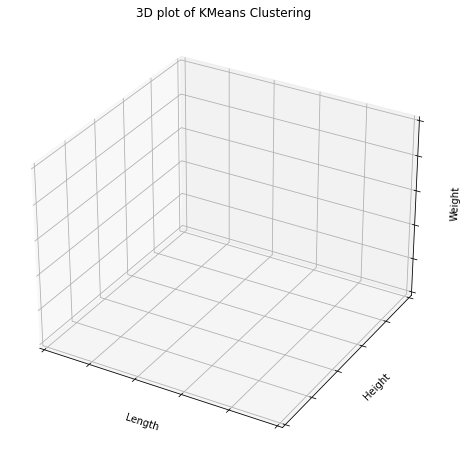

In [59]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1])
k_means_plotting.fit(merged_df_scaled)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

#### Part 1.3 g - Pass a new DataPoint and predict which cluster it belongs to.

In [60]:
data = {'mpg' : [16, 31.0] ,'cyl' : [9, 4], 'disp' : [280, 119.0],'hp' : [100, 82.0],'wt' : [3400, 2000], 'acc' : [9,19.4], 'yr' : [70, 82],
                        'origin' : [2, 1]}

In [61]:
new_dataframe = pd.DataFrame(data= data)

In [62]:
new_dataframe

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,16.0,9,280.0,100.0,3400,9.0,70,2
1,31.0,4,119.0,82.0,2000,19.4,82,1


In [63]:
k_means_optimal_6.predict(new_dataframe)

array([1, 1])

In [64]:
print('Both the random points were beloning to cluster 1.')

Both the random points were beloning to cluster 1.


## Part B
### • CONTEXT: 
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The 
vehicle may be viewed from one of many different angles.

### • DATA DESCRIPTION: 
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were 
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles 
was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to 
distinguish between the cars.
• All the features are numeric i.e. geometric features extracted from the silhouette.

#### Part 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame.

In [20]:
vehicle = pd.read_csv(r'C:\Users\Datta\Downloads\vehicle.csv')
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


#### Part 2.1 b- Check percentage of missing values and impute with correct approach.

In [22]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [23]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [24]:
print(str((5/846) * 100) + ' percentage of null values in circularity feature')
print(str((4/846) * 100) + ' percentage of null values in distance circularity feature')
print(str((6/846) * 100) + ' percentage of null values radius_ratio feature')
print(str((2/846) * 100) + ' percentage of null values in pr.axis_aspect_ratio feature')
print(str((1/846) * 100) + ' percentage of null values in scatter_ratio feature')
print(str((1/846) * 100) + ' percentage of null values in elongatedness feature')
print(str((3/846) * 100) + ' percentage of null values in pr.axis_rectangularity feature')
print(str((3/846) * 100) + ' percentage of null values in scaled_variance feature')
print(str((2/846) * 100) + ' percentage of null values in scaled_variance.1 feature')
print(str((2/846) * 100) + ' percentage of null values in scaled_radius_of_gyration feature')
print(str((4/846) * 100) + ' percentage of null values in scaled_radius_of_gyration.1 feature')
print(str((6/846) * 100) + ' percentage of null values in skewness_about feature')
print(str((1/846) * 100) + ' percentage of null values in skewness_about.1 feature')
print(str((1/846) * 100) + ' percentage of null values in skewness_about.2 feature')

0.5910165484633569 percentage of null values in circularity feature
0.4728132387706856 percentage of null values in distance circularity feature
0.7092198581560284 percentage of null values radius_ratio feature
0.2364066193853428 percentage of null values in pr.axis_aspect_ratio feature
0.1182033096926714 percentage of null values in scatter_ratio feature
0.1182033096926714 percentage of null values in elongatedness feature
0.3546099290780142 percentage of null values in pr.axis_rectangularity feature
0.3546099290780142 percentage of null values in scaled_variance feature
0.2364066193853428 percentage of null values in scaled_variance.1 feature
0.2364066193853428 percentage of null values in scaled_radius_of_gyration feature
0.4728132387706856 percentage of null values in scaled_radius_of_gyration.1 feature
0.7092198581560284 percentage of null values in skewness_about feature
0.1182033096926714 percentage of null values in skewness_about.1 feature
0.1182033096926714 percentage of null

In [25]:
vehicle.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [26]:
vehicle[vehicle.isna().any(axis=1)]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus


In [29]:
vehicle['circularity'].fillna(vehicle['circularity'].mean(), inplace= True)
vehicle['distance_circularity'].fillna(vehicle['distance_circularity'].mean(), inplace= True)
vehicle['radius_ratio'].fillna(vehicle['radius_ratio'].mean(), inplace= True)
vehicle['pr.axis_aspect_ratio'].fillna(vehicle['pr.axis_aspect_ratio'].mean(), inplace= True)
vehicle['scatter_ratio'].fillna(vehicle['scatter_ratio'].mean(), inplace= True)
vehicle['elongatedness'].fillna(vehicle['elongatedness'].mean(), inplace= True)
vehicle['pr.axis_rectangularity'].fillna(vehicle['pr.axis_rectangularity'].mean(), inplace= True)
vehicle['scaled_variance'].fillna(vehicle['scaled_variance'].mean(), inplace= True)
vehicle['scaled_variance.1'].fillna(vehicle['scaled_variance.1'].mean(), inplace= True)
vehicle['scaled_radius_of_gyration'].fillna(vehicle['scaled_radius_of_gyration'].mean(), inplace= True)
vehicle['scaled_radius_of_gyration.1'].fillna(vehicle['scaled_radius_of_gyration.1'].mean(), inplace= True)
vehicle['skewness_about'].fillna(vehicle['skewness_about'].mean(), inplace= True)
vehicle['skewness_about.1'].fillna(vehicle['skewness_about.1'].mean(), inplace= True)
vehicle['skewness_about.2'].fillna(vehicle['skewness_about.2'].mean(), inplace= True)
vehicle[vehicle.isna().any(axis=1)]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [30]:
vehicle.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#### Part 2.1 c- Visualize a Pie-chart and print percentage of values for variable ‘class’.

In [31]:
vehicle['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [32]:
feature_type = vehicle.groupby('class').agg('count')
feature_labels = feature_type.compactness.sort_values().index
feature_counts = feature_type.compactness.sort_values()

In [33]:
feature_counts

class
van    199
bus    218
car    429
Name: compactness, dtype: int64

In [34]:
feature_type

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
car,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
van,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199


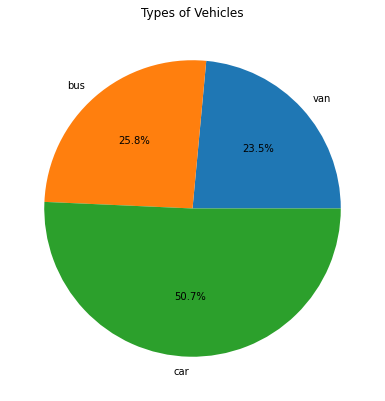

In [37]:
plt.figure(1, figsize=(30,15))                                               # Answer
the_grid = GridSpec(2, 2)
      
title_categorical_column_set = {'class' : 'Types of Vehicles'}
                
plt.subplot(the_grid[0, 1], aspect=1, title= title_categorical_column_set['class'])
type_feature = plt.pie(feature_counts, labels= feature_labels, autopct='%1.1f%%')
plt.show()

#### Part 2.1 d - Check for duplicate rows in the data and impute with correct approach.

In [38]:
vehicle.duplicated().sum()

0

#### Part 2.2 a - Split data into X and Y.

In [39]:
X = vehicle.drop(labels= ['class'], axis= 1)
y = vehicle['class']

In [41]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [42]:
y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 1 )

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(676, 18)
(170, 18)
(676,)
(170,)


#### Part 2.2 b - Standardize the Data.

In [53]:
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

In [54]:
X_train_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
135,-0.581861,0.341923,0.041768,4.503410,8.714250,8.151668,-0.343491,0.278409,-0.238333,1.033734,1.247643,-0.440553,0.012861,3.159603,-1.296586,0.159760,-0.798211,-0.216177
223,-1.550674,-0.149218,-0.650475,-0.894579,-0.214160,-0.541322,-0.493029,0.405914,-0.622167,-0.150562,-0.291034,-0.535975,0.074022,1.090092,-1.089484,0.270369,-1.125542,-1.280920
388,0.023647,0.341923,0.167631,4.827879,9.325785,8.358643,-0.433214,0.278409,-0.622167,0.476418,4.105186,-0.496684,0.349248,8.074692,1.188632,-0.393283,-0.143551,0.050008
134,0.992460,1.487919,1.111599,-0.186646,-1.070309,0.286582,1.301428,-1.251642,1.297003,1.730378,0.933627,1.271440,0.777378,0.443370,1.188632,1.597672,-0.307216,-0.083085
619,0.386952,1.651633,0.859874,0.019835,-0.948002,0.286582,1.391151,-1.251642,1.297003,1.730378,0.933627,1.361250,1.297249,0.314026,-1.296586,-0.946326,-0.798211,-0.349270


In [55]:
X_test_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
693,-0.392245,0.241682,-0.412779,-1.095461,-0.976121,0.746112,-0.205616,0.209298,-0.171350,0.904910,-0.450286,-0.347792,-0.007952,0.805530,-1.314555,0.380154,-1.125753,-0.515369
375,1.953960,1.208411,0.916105,0.701402,-0.518008,-1.244635,1.887296,-1.622059,1.823818,0.705986,2.609413,2.068004,1.448109,1.603550,-1.314555,0.735243,-0.331653,-1.359151
185,0.842600,-0.563925,-0.412779,1.214791,1.467149,-0.960242,0.294184,-0.706380,0.227684,-0.620176,0.615452,0.305126,-0.641023,0.007511,0.043362,0.735243,1.256546,0.187783
464,0.842600,0.725047,-0.080558,1.246878,1.314444,-0.675850,0.512846,-0.837192,0.227684,0.573370,0.684210,0.530679,0.846692,0.167115,-0.732590,0.025065,1.415366,0.469044
709,0.225178,-0.402804,0.982549,0.958096,0.550923,0.177327,0.356659,-0.575569,0.227684,-0.421251,0.443559,0.275448,-0.704330,-0.790509,-1.120567,1.918872,0.621266,0.609674


#### Part 2.3 a - Train a base Classification model using SVM.

In [57]:
svm2 = SVC(gamma=0.025, C=3)

In [58]:
svm2.fit(X_train_scaled, y_train)

SVC(C=3, gamma=0.025)

In [59]:
svm2_predictions = svm2.predict(X_test_scaled)

In [60]:
svm2_predictions

array(['van', 'bus', 'bus', 'bus', 'car', 'car', 'van', 'van', 'van',
       'van', 'van', 'van', 'bus', 'car', 'bus', 'car', 'van', 'bus',
       'van', 'bus', 'car', 'car', 'car', 'car', 'van', 'van', 'bus',
       'car', 'car', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'bus', 'car', 'bus', 'bus', 'car', 'van', 'van', 'car', 'van',
       'van', 'car', 'car', 'car', 'car', 'car', 'car', 'bus', 'car',
       'car', 'van', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'van', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car', 'van',
       'car', 'van', 'bus', 'car', 'car', 'car', 'van', 'car', 'car',
       'van', 'car', 'car', 'bus', 'car', 'van', 'car', 'bus', 'bus',
       'car', 'bus', 'van', 'van', 'van', 'van', 'bus', 'bus', 'bus',
       'car', 'car', 'car', 'van', 'van', 'van', 'car', 'car', 'car',
       'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'van', 'car',
       'van', 'van', 'car', 'car', 'van', 'car', 'car', 'car', 'car',
       'van', 'car',

#### Part 2.3 b - Print Classification metrics for train data.

In [61]:
svm2.score(X_train_scaled, y_train)

0.9792899408284024

In [62]:
svm2.score(X_test_scaled, y_test)

0.9705882352941176

In [65]:
print(confusion_matrix(y_test, svm2_predictions))                                                
print('\n')
print(classification_report(y_test, svm2_predictions))
print('\n')
print('We got 97% accuracy with good average 98% recall and average 96% precision')

[[37  0  0]
 [ 2 86  2]
 [ 0  1 42]]


              precision    recall  f1-score   support

         bus       0.95      1.00      0.97        37
         car       0.99      0.96      0.97        90
         van       0.95      0.98      0.97        43

    accuracy                           0.97       170
   macro avg       0.96      0.98      0.97       170
weighted avg       0.97      0.97      0.97       170



We got 97% accuracy with good average 98% recall and average 96% precision


#### Part 2.3 c - Apply PCA on the data with 10 components.

In [67]:
X_scaled_2 = X.apply(zscore)
X_scaled_2.shape

(846, 18)

In [68]:
X_scaled_2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.272965,1.310206,0.311542,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.327938,-0.074340,0.380665,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593962,0.094079,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.059987,0.537873,0.156589,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.201630,0.548539,0.311542,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.073989,1.558230,-0.403603,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167705,0.094079,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.265769,-0.074340,-0.291565,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.081803,5.245485,9.444962,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593,7.308682,0.537873,-0.179527,-1.450677,-1.699181


In [69]:
covMatrix = np.cov(X_scaled_2,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [70]:
pca10 = PCA(n_components= 10)

In [71]:
pca10.fit(X_scaled_2)

PCA(n_components=10)

In [72]:
pca10.score(X_scaled_2, y)

-9.590522280550672

In [73]:
print(pca10.explained_variance_)

[9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982
 0.35856646 0.22166173 0.16003619 0.09171409]


In [74]:
print(pca10.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [75]:
print(pca10.explained_variance_ratio_)

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681 0.01229998 0.00888039 0.0050892 ]


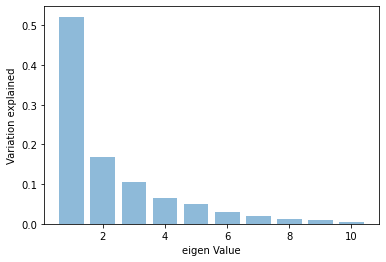

In [76]:
plt.bar(list(range(1,11)),pca10.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Part 2.3 d - Visualize Cumulative Variance Explained with Number of Components.

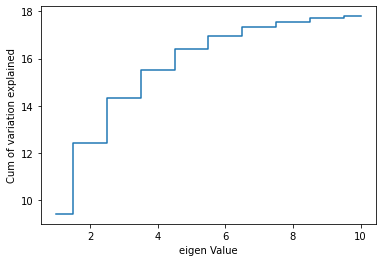

In [77]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

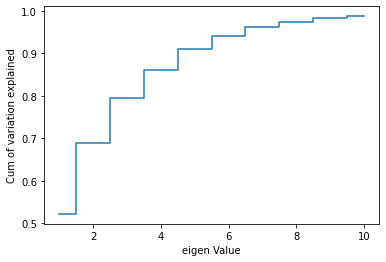

In [78]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

- **Most of the cumulative variance explained is around eigen value 5 or 6**

#### Part 2.3 e - Draw a horizontal line on the above plot to highlight the threshold of 90%.

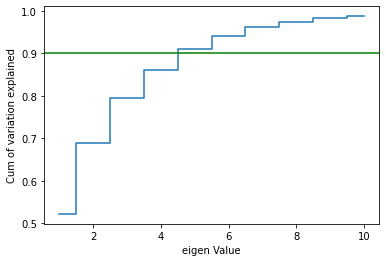

In [79]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y=0.90, color='g', linestyle='-')      # The line cuts between principal components/eigen values 4 and 5         
plt.show()

#### Part 2.3 f - Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [80]:
pca6 = PCA(n_components= 6)
pca6.fit(X_scaled_2)

PCA(n_components=6)

In [81]:
print(pca6.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [82]:
print(pca6.explained_variance_)

[9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982]


In [83]:
print(pca6.explained_variance_ratio_)

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458]


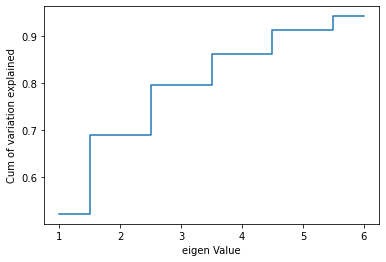

In [84]:
plt.step(list(range(1,7)),np.cumsum(pca6.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [85]:
Xpca6 = pca6.transform(X_scaled_2)
pca6

PCA(n_components=6)

In [86]:
Xpca6

array([[ 3.32393198e-01, -2.18638382e-01,  1.00128619e+00,
         1.77327855e-01,  7.91062378e-02, -7.54813577e-01],
       [-1.59374091e+00, -4.20549398e-01, -3.69264301e-01,
         2.33484079e-01,  6.93397240e-01, -5.19073098e-01],
       [ 3.76753509e+00,  1.95040767e-01,  8.82372311e-02,
         1.20312936e+00,  7.30906518e-01,  7.05376870e-01],
       ...,
       [ 4.80780979e+00, -1.82373823e-03,  5.32772800e-01,
         2.95987951e-01, -1.34473735e+00, -2.19629918e-01],
       [-3.29572788e+00, -1.00880341e+00, -3.57467658e-01,
        -1.93324092e+00,  4.30752760e-02, -4.03456798e-01],
       [-4.76673461e+00,  3.34686477e-01, -5.68739264e-01,
        -1.22499022e+00, -5.42871258e-02, -3.36467836e-01]])

In [87]:
tranformed_componenets = pd.DataFrame(Xpca6)
tranformed_componenets.head()

,0,1,2,3,4,5
0,0.332393,-0.218638,1.001286,0.177328,0.079106,-0.754814
1,-1.593741,-0.420549,-0.369264,0.233484,0.693397,-0.519073
2,3.767535,0.195041,0.088237,1.203129,0.730907,0.705377
3,-1.740753,-2.829579,0.109176,0.377522,-0.363483,-0.487863
4,0.555239,4.757557,11.703588,0.145068,3.257651,-0.211649


#### Part 2.3 g - Train SVM model on components selected from above step.

In [88]:
SVM_PCA = SVC(gamma=0.025, C=3)
SVM_PCA.fit(Xpca6, y)

SVC(C=3, gamma=0.025)

#### Part 2.3 h - Print Classification metrics for train data of above model and share insights.

In [89]:
SVM_PCA.score(Xpca6, y)

0.8900709219858156

- **Got almost 90% score as it is in-sample data**

#### Part 2.4 a - Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [91]:
SVM_out_of_components = SVC(gamma=0.025, C=3)
SVM_out_of_components.fit(X_train_scaled,y_train)

SVC(C=3, gamma=0.025)

In [92]:
SVM_out_of_components.score(X_train_scaled, y_train)

0.9792899408284024

In [93]:
SVM_out_of_components.score(X_test_scaled, y_test)

0.9705882352941176

In [94]:
SVM_out_of_components_tuning_C = [0.01, 0.1, 1, 10, 100, 1000 ]
SVM_out_of_components_tuning_gamma = [1, 0.1, 0.001, 0.0001, 0.00001]

In [95]:
SVM_out_of_components_tuning_hyperparameters = dict(gamma= SVM_out_of_components_tuning_gamma, C= SVM_out_of_components_tuning_C)

In [96]:
SVM_out_of_components_tuning_hyperparameters

{'gamma': [1, 0.1, 0.001, 0.0001, 1e-05], 'C': [0.01, 0.1, 1, 10, 100, 1000]}

In [98]:
SVM_out_of_components_tuning = SVC()
SVM_out_of_components_tuning_GS_classifier = GridSearchCV(SVM_out_of_components_tuning, SVM_out_of_components_tuning_hyperparameters, cv= 5)

In [99]:
SVM_out_of_components_tuning_GS_classifier

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]})

In [100]:
SVM_out_of_components_best_model = SVM_out_of_components_tuning_GS_classifier.fit(X_train_scaled, y_train)

In [101]:
SVM_out_of_components_best_model

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]})

In [102]:
df_SVM_out_of_components_best_model_results = pd.DataFrame(SVM_out_of_components_best_model.cv_results_)
df_SVM_out_of_components_best_model_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038514,0.010111,0.013849,0.008082,0.01,1,"{'C': 0.01, 'gamma': 1}",0.5,0.496296,0.503704,0.503704,0.503704,0.501481,0.002963,20
1,0.027672,0.012344,0.011869,0.003399,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.5,0.496296,0.503704,0.503704,0.503704,0.501481,0.002963,20
2,0.022381,0.002285,0.009607,0.000480,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.5,0.496296,0.503704,0.503704,0.503704,0.501481,0.002963,20
3,0.020410,0.000248,0.010808,0.002604,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.5,0.496296,0.503704,0.503704,0.503704,0.501481,0.002963,20
4,0.020398,0.000471,0.010017,0.000669,0.01,0.00001,"{'C': 0.01, 'gamma': 1e-05}",0.5,0.496296,0.503704,0.503704,0.503704,0.501481,0.002963,20


In [103]:
df_SVM_out_of_components_best_model_results[['param_gamma','param_C','params','mean_test_score']]

,param_gamma,param_C,params,mean_test_score
0,1,0.01,"{'C': 0.01, 'gamma': 1}",0.501481
1,0.1,0.01,"{'C': 0.01, 'gamma': 0.1}",0.501481
2,0.001,0.01,"{'C': 0.01, 'gamma': 0.001}",0.501481
3,0.0001,0.01,"{'C': 0.01, 'gamma': 0.0001}",0.501481
4,0.00001,0.01,"{'C': 0.01, 'gamma': 1e-05}",0.501481
5,1,0.1,"{'C': 0.1, 'gamma': 1}",0.502963
6,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.832810
7,0.001,0.1,"{'C': 0.1, 'gamma': 0.001}",0.501481
8,0.0001,0.1,"{'C': 0.1, 'gamma': 0.0001}",0.501481
9,0.00001,0.1,"{'C': 0.1, 'gamma': 1e-05}",0.501481


#### Part 2.4 b- Share best Parameters observed from above step.

In [104]:
print(SVM_out_of_components_best_model.best_estimator_)

SVC(C=10, gamma=0.1)


In [105]:
print(SVM_out_of_components_best_model.get_params)

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]})>


In [106]:
print(SVM_out_of_components_best_model.best_score_)

0.9704575163398694


In [108]:
SVM_out_of_components_FINAL_MODEL = SVC(gamma= 0.1, C= 10 )
SVM_out_of_components_FINAL_MODEL.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1)

In [109]:
SVM_out_of_components_FINAL_MODEL_predictions = SVM_out_of_components_FINAL_MODEL.predict(X_test_scaled)

In [110]:
SVM_out_of_components_FINAL_MODEL_predictions

array(['van', 'bus', 'bus', 'bus', 'car', 'car', 'van', 'van', 'van',
       'van', 'van', 'van', 'bus', 'car', 'bus', 'car', 'van', 'bus',
       'car', 'bus', 'car', 'car', 'car', 'car', 'van', 'van', 'bus',
       'car', 'car', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'bus', 'car', 'bus', 'bus', 'car', 'van', 'van', 'car', 'car',
       'van', 'car', 'car', 'car', 'car', 'car', 'car', 'bus', 'car',
       'car', 'van', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'van', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car', 'van',
       'car', 'van', 'bus', 'car', 'car', 'car', 'van', 'car', 'car',
       'van', 'car', 'car', 'bus', 'car', 'van', 'car', 'bus', 'bus',
       'car', 'bus', 'van', 'van', 'van', 'van', 'bus', 'bus', 'bus',
       'car', 'car', 'car', 'car', 'van', 'van', 'car', 'car', 'car',
       'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'van', 'car',
       'van', 'van', 'car', 'car', 'van', 'van', 'car', 'van', 'car',
       'van', 'car',

#### Part 2.4 c- Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [111]:
SVM_out_of_components_FINAL_MODEL.score(X_train_scaled, y_train)

0.9985207100591716

In [112]:
SVM_out_of_components_FINAL_MODEL.score(X_test_scaled, y_test)

0.9705882352941176

In [113]:
confusion_matrix(y_test, SVM_out_of_components_FINAL_MODEL_predictions)

array([[37,  0,  0],
       [ 1, 87,  2],
       [ 0,  2, 41]], dtype=int64)

In [116]:
print(classification_report(y_test, SVM_out_of_components_FINAL_MODEL_predictions))

              precision    recall  f1-score   support

         bus       0.97      1.00      0.99        37
         car       0.98      0.97      0.97        90
         van       0.95      0.95      0.95        43

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170



In [117]:
print('In SVM using principal components we got 90 % score')

In SVM using principal components we got 90 % score


#### Part 2.5 a - Explain pre-requisite/assumptions of PCA.

- The relationship between all observed variables should be linear.
- All variables should be assessed on an interval.
- All variables should be accessed on the same ratio level of measurement. The most preferred norm is at least 150 observations of the sample set with a ratio measurement of 5:1.
- 

#### Part 2.5 b - Explain advantages and limitations of PCA.

**Advantages :**
- Computational time is faster.
- We are able to get good accuracy score even after reducing the dimensions.
- Reduces no. of independent variables.
- Reduces no. of variables and creates new few variables from old variables which are common in data.

**Limitations :**
- After PCA model is instantiated, the data is not interpretable.
- If we drop any varibales, we might lose some information.
- Data should be standardized before applying the model